# <u><b>COURSE RECOMMENDATION & SUBJECT CLASSIFICATION on <i>UDEMY</i> DATSET</b></u>

<b><i>Srichandan Dash</i></b>
<br>
B.Tech in Electronics and Communication Engineering
<br>
Indian Institute of Technology, Guwahati

## <u>TABLE <i>of</i> CONTENTS</u>
* [<b>Introduction</b>](#intro)
* [<b>Dataset Description</b>](#dataset)
* [<b>Exploratory Data Analysis</b>](#eda)
    - [EDA on Subjects](#eda-sub)
    - [EDA on Subscribers](#eda-subscribe)
    - [EDA on Levels](#eda-level)
    - [EDA on Lectures & Reviews](#eda-coll)
    - [EDA on Prices](#eda-price)
    - [Correlation Analysis on Subscribers](#corr-subs)
    - [Analysis on Published Year](#pub-year)
    - [Analysis via Pair Plot on Continues Values Features](#pair-plot)
    - [Analysis of Course Titles](#course-title)  
* [<b>Course Recommendation</b>](#cm)
    - [Cosine Simillarity Index](#cos-sim)
    - [Data Vectorization](#data-vec)
    - [Cosine Similarity Matrix](#cos-sim-mat)
    - [Recommendation](#recm)
* [<b>Subject Prediction for a Course Title</b>](#sbj)
    - [Text Cleaning](#text-clean)
    - [Text Vectorization](#text-vec)
    - [Model Building & Evaluation](#model)
    - [Model Interpretation](#model-intr)

## <u>INTRODUCTION<a class="anchor" id="intro"></a></u>
<br>
<div style="text-align: justify"> 
The project aims at developing a Course Recommendation System for recommending courses present in udemy database. With rising and use of online platforms for developing educational systems, use of techniques like recoomendation engines cna help business target and attract more audiences to their product websites. This further leads to larger numebr of subscribers for existing courses. The customer on the other side also benifits as he is able to get faster access to thecourses which are most simillar to his preferred skills and desired courses. 
</div>
<br>
<div style="text-align: justify">
This project focuses on both data cleaning, data analysis of existing dataset and also the implementation of the recommendation engine. The dataset used is the latest datset on Udemy Courses available on Kaggle. Explratory data analysis is performed to answer a wide variety of questions and to understand and establish intiutive relationships between features. This is achieved via various plots and graphs between the feature sets using data visualization tools. The similarity indexed chosen for the recommender system development is Cosine Similarity. The index has wide spread application in development of recommendation engines. 
</div>
<br>
<div style="text-align: justify"> 
</div>

In [1]:
# Loading Necessary Packages for EDA and Data Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px
%matplotlib inline

# Setting Style and Palette for Seaborn Plots
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_palette('Dark2')
sns.set_style("darkgrid", rc=custom_style)

# Hiding All Warnings
import warnings
warnings.filterwarnings('ignore')

#NOTE!!!!
#Plotly charts are not directly visible in GitHub kindly view the same in Jupyter Lab and ensure that Plotly extension for Jupyter Lab is installed

## <u>DATASET</u><a class="anchor" id="dataset"></a>
<br>
<div style="text-align: justify"> 
Kaggle is the primary source for the data set being used. It comprises the latest list of courses in Udemy database and all relevant information regarding the courses. The dataset comprises records for 3678 courses and 12 features per course. These features are <i>course_id</i>, <i>course_title</i>, <i>url</i>, <i>is_paid</i>, <i>price</i>, <i>num_subscribers</i>, <i>num_reviews</i>, <i>num_lectures</i>, <i>level</i>, <i>content_duration</i>, <i>published_timestamp</i> and <i>subject</i>.
</div>
<br>
<div style="text-align: justify">
This project focuses on both data cleaning, data analysis of existing dataset and also the implementation of the recommendation engine. The dataset used is the latest datset on Udemy Courses available on Kaggle. Explratory data analysis is performed to answer a wide variety of questions and to understand and establish intiutive relationships between features. This is achieved via various plots and graphs between the feature sets using data visualization tools. The similarity indexed chosen for the recommender system development is Cosine Similarity. The index has wide spread application in development of recommendation engines. 
</div>
<br>
<div style="text-align: justify"> 
</div>

In [2]:
# Load Dataset
df = pd.read_csv("udemy_courses_new.csv")

In [3]:
df.shape

(3678, 12)

In [4]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


## <u>EXPLORATORY DATA ANALYSIS</u><a class="anchor" id="eda"></a>
<br>
<div style="text-align: justify"> 
This section focues on analysis of the data in hand. We will perform various kinds of exploratory data analysis on teh dat ato grab insights on the interdependency of features and various other correlation inferences. Matplotlib, Seaborn and Plotly are utilized for visualization purposes. The various sections on which the exploratory analysis will be based and teh corresponding inferences are described in further sections.
</div>
<br>

### EDA on Subject/Category <a class="anchor" id="eda-sub"></a>
+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

In [5]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [6]:
# Types of subject/category are there in the dataset
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [7]:
# How many subject/category are there in the dataset
len(df['subject'].unique())

4

In [8]:
# Grouping all teh courses on teh basis of Subject/ COurse Category

d = {'CourseCategory':df['subject'].value_counts().index, 'Number':df['subject'].value_counts()}
df_sub_count = pd.DataFrame(data = d, index = None)
df_sub_count = df_sub_count.reset_index().drop('index', 1)
df_sub_count

,CourseCategory,Number
0,Web Development,1200
1,Business Finance,1195
2,Musical Instruments,680
3,Graphic Design,603


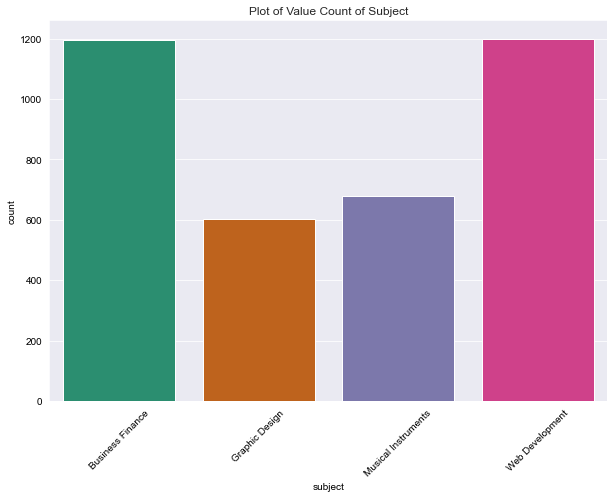

In [9]:
#Using Count Plot of Seaborn to plot the NUmber of courses per subject

plt.figure(figsize=(10,7))
sns.countplot(df['subject'])
plt.title("Plot of Value Count of Subject")
plt.xticks(rotation=45)
plt.show()

In [10]:
#NOTE!!!!
#Plotly charts are not directly visible in GitHub kindly view the same in Jupyter Lab and ensure that Plotly extension for Jupyter Lab is installed

# Plot Distribution of Subject/Value Counts with Plotly Interactive Pie Chart
fig = px.pie(df_sub_count, values='Number', names='CourseCategory', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### INFERENCE
+ <i>Maximum number of courses are of Web Development and Business Finance categories.</i>
+ <i> We can see that the 4 types of subjects can be grouped into two classes as the number of courses do not vary much.</i>
________________________________________

### EDA on Subscribers <a class="anchor" id="eda-subscribe"></a>
+ Subscribers
    - Which course have the highest number of subscribers
    - Average number of subscribers
    - Number of subscribers per Subject
    - Number of subscribers per year

In [11]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [12]:
# Number of subscribers per Subject
d = {'CourseCategory':df.groupby('subject').sum().index, 'NumberOfSubscribers':df.groupby('subject').sum()['num_subscribers']}
df_subscribers = pd.DataFrame(data = d)
df_subscribers

,CourseCategory,NumberOfSubscribers
subject,,
Business Finance,Business Finance,1868711
Graphic Design,Graphic Design,1063148
Musical Instruments,Musical Instruments,846689
Web Development,Web Development,7980572


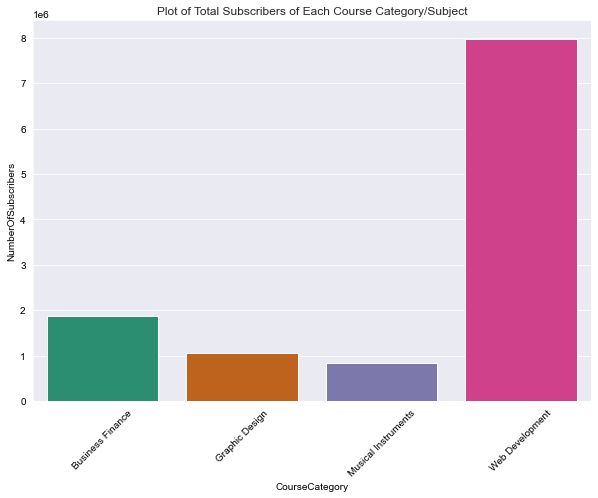

In [13]:
# Seaborn Bar Plot of the total Number of subscribers per Subject
plt.figure(figsize=(10,7))
sns.barplot(x = 'CourseCategory', y = 'NumberOfSubscribers', data = df_subscribers)
plt.title("Plot of Total Subscribers of Each Course Category/Subject")
plt.xticks(rotation=45)
plt.show()

In [14]:
#NOTE!!!!
#Plotly charts are not directly visible in GitHub kindly view the same in Jupyter Lab and ensure that Plotly extension for Jupyter Lab is installed

# Plot of the Number of subscribers per Subject via Plotly Interactive Pie Chart
fig = px.pie(df_subscribers, values='NumberOfSubscribers', names='CourseCategory', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### INFERENCE
+ <i>Unlike the number of courses per subject, maximum number of Subscribers are of Web Development compared to Business and Finance.</i>
+ <i> We can see that thetop subject category is Web Dev, Business Finance.</i>

In [15]:
# Total Number of Subscribers
df['num_subscribers'].sum()

11759120

In [16]:
##Average number of subscribers
df['num_subscribers'].mean()


3197.150625339859

In [17]:
# Min number of subscriber
df['num_subscribers'].min()

0

In [18]:
# Max number of subscriber
df['num_subscribers'].max()

268923

In [19]:
# Index of course that has the highest number of sub
df['num_subscribers'].idxmax()

2827

In [20]:
# GCourse with MAX number of Subscribers
df.iloc[2827]

course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                                  0
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                                    10.5
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
Name: 2827, dtype: object

#### INFERENCE
+ <i>Udemy has over 11 million subscribers and an average of 3198 subscribers per course.</i>
+ <i>268923 is the highest number of subscribers for a course.</i>
__________________________

### EDA on Levels <a class="anchor" id="eda-level"></a>
+ Levels
    - How many levels do we have?
    - What is the distribution of courses per levels?
    - Which subject have the highest levels?
    - How many subscribers per levels?
    - How many courses per levels?

In [21]:
# How many levels do we have
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [22]:
# What is the distribution of courses per levels
df['level'].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [23]:
#NUmber of courses per level

d = {'Level':df['level'].value_counts().index, 'Number':df['level'].value_counts()}
df_levels = pd.DataFrame(data = d)
df_levels

,Level,Number
All Levels,All Levels,1929
Beginner Level,Beginner Level,1270
Intermediate Level,Intermediate Level,421
Expert Level,Expert Level,58


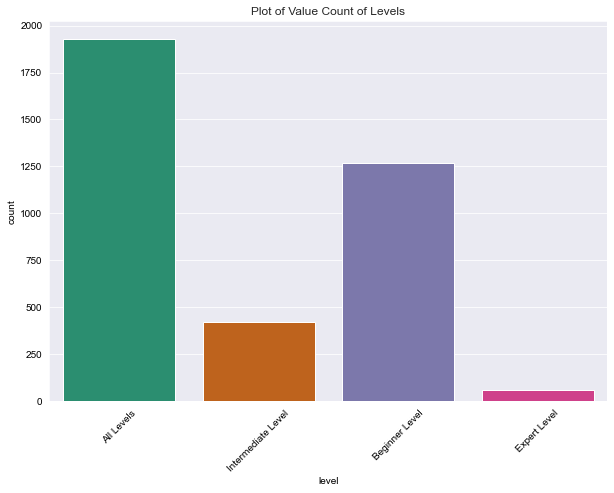

In [24]:
# Seborn Barplot on distribution of courses per levels
plt.figure(figsize=(10,7))
sns.countplot(df['level'])
plt.title("Plot of Value Count of Levels")
plt.xticks(rotation=45)
plt.show()

In [25]:
# Distribution of courses per level via Plotly Interactive Pie Chart
fig = px.pie(df_levels, values='Number', names='Level', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [26]:
#  How many subscribers per levels
d = {'Level':df.groupby('level').sum().index, 'NumberOfSubscribers':df.groupby('level').sum()['num_subscribers']}
df_sub_level = pd.DataFrame(data = d)
df_sub_level

,Level,NumberOfSubscribers
level,,
All Levels,All Levels,6915076
Beginner Level,Beginner Level,4051843
Expert Level,Expert Level,50196
Intermediate Level,Intermediate Level,742005


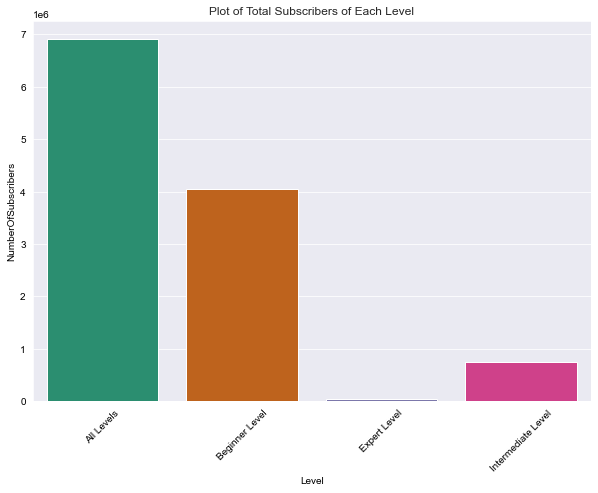

In [27]:
# Seborn Barplot on How many subscribers per levels
plt.figure(figsize=(10,7))
sns.barplot(x = 'Level', y = 'NumberOfSubscribers', data = df_sub_level)
plt.title("Plot of Total Subscribers of Each Level")
plt.xticks(rotation=45)
plt.show()

In [28]:
# Distribution of total sunscribers per level via Plotly Interactive Pie Chart
fig = px.pie(df_sub_level, values='NumberOfSubscribers', names='Level', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### INFERENCE
+ <i>Subscribers prefer to choose courses which cover all levels of skills compared to the ones which are specific to a particular level.</i>
+ <i>Number of subscribers in Intermmediate and Expert levels goes down drastically.</i>

In [29]:
# How many levels per subject category
df.groupby('subject')['level'].value_counts()

subject              level             
Business Finance     All Levels            696
                     Beginner Level        340
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: level, dtype: int64

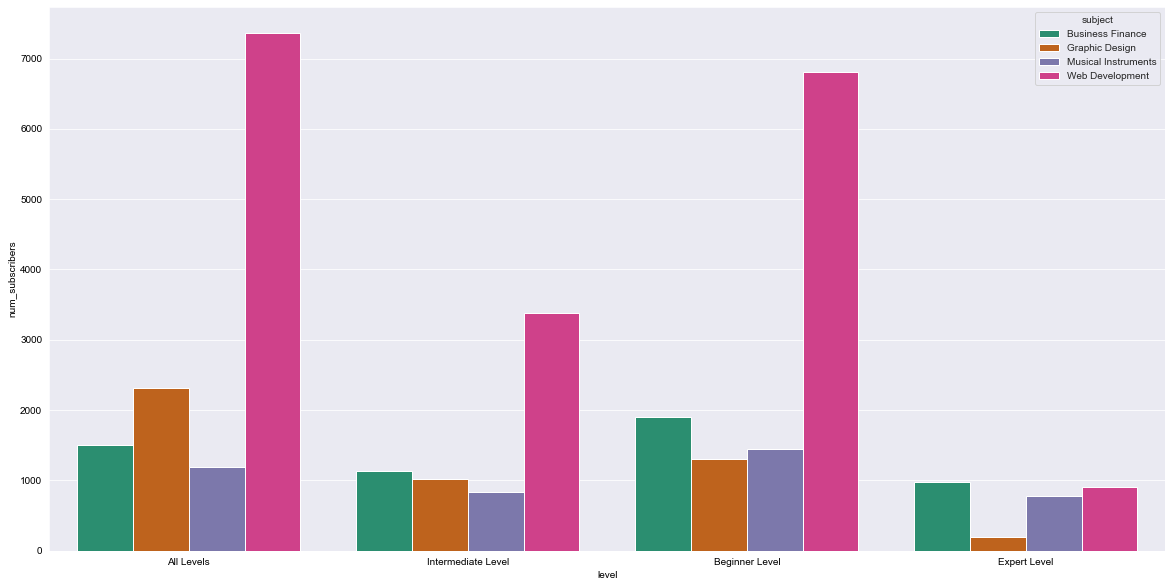

In [30]:
# Seaborn Bar Plot of Level VS NUmber of Subscribers w.r.t. the Subject of the course
plt.figure(figsize=(20,10))
sns.barplot(x='level',y='num_subscribers', hue='subject',data=df,ci=None)
plt.show()

#### INFERENCE
+ <i>Web Development is the most preffered course across different levels of courses.</i>
+ <i>Only in the case of Expert Level courses, Business and Finance beats Web Development on number of subscribers with a small margin.</i>
________________

### EDA on Lectures and Reviews <a class="anchor" id="eda-coll"></a>
+ Criterias
    - Number of Lectures per Level per Subject
    - Number of Course Reviews per Level per Subject

In [31]:
#Function to display the required Bar plot and Pie charts
def plot_num_of_countable_feature(feature):
    
    # Using Seaborn 
    plt.figure(figsize=(10,7))
    plt.title("Plot of {} per level per subject".format(feature))
    sns.barplot(x='level',y=feature, hue='subject',data=df,ci=None)
    plt.show()
  
    d = {'Level':df.groupby('level')[feature].sum().index, 'NumberOf {}'.format(feature):df.groupby('level')[feature].sum()}
    df_feature = pd.DataFrame(data = d)
    fig = px.pie(df_feature, values='NumberOf {}'.format(feature), names='Level', color_discrete_sequence=px.colors.sequential.RdBu)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

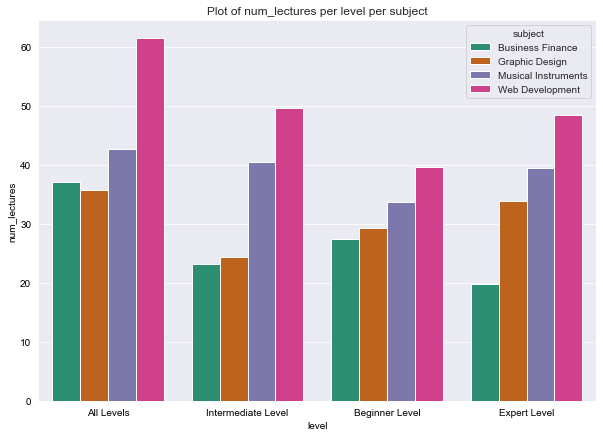

In [32]:
# Plot of Lectures per Level per Subject
plot_num_of_countable_feature('num_lectures')

#### INFERENCE
+ <i>Web Development has the maximum number of lectures across different levels of courses.</i>
+ <i>NUmber of lectures for Graphic Deisgn has an edge over Business Finance in case of Beginner, Intermmediate and Expert levels.</i>
________________

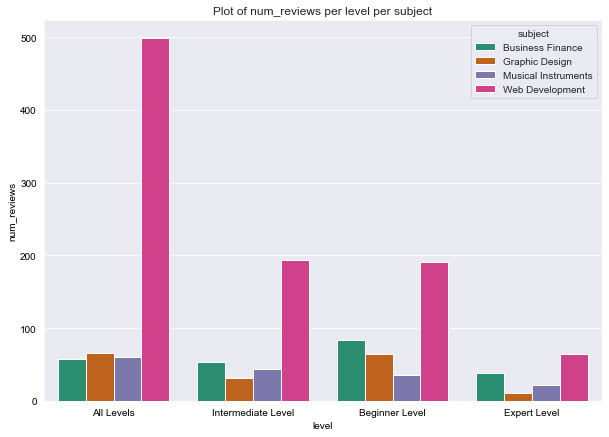

In [33]:
# Plotr for Reviews per Level per Subject
plot_num_of_countable_feature('num_reviews')

#### INFERENCE
+ <i>Number of reviews for all courses except Web Development is more or less the same across different levels.</i>
+ <i>Unlike other subjects, the number of reviews in case of Web Development are drastically high in 'All Levels'comapred to other levels</i>
________________

### EDA on Price <a class="anchor" id="eda-price"></a>
+ Price
	- What is the average price of a course?
	- What is the min/max price?
	- How much does Udemy earn?
	- Which are the most profitable courses?


In [34]:
# Datatype
df['price'].dtype

dtype('int64')

In [35]:
# unique price
df.price.unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

In [36]:
df['price'] = df['price'].astype(float)

In [37]:
# What is the average price
df['price'].mean()

66.0494834148994

In [38]:
# What is the max price
df['price'].max()

200.0

In [39]:
# What is the max price location
df['price'].idxmax()

0

In [40]:
#Course with the maximum price

df.iloc[0]

course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                                200
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                                     1.5
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
Name: 0, dtype: object

In [41]:
# Storing Profit for each course
# price x num_subscriber
df['profit'] = df['price'] * df['num_subscribers']

In [42]:
# What is the most profitable
df['profit'].max()

24316800.0

In [43]:
# The location of course
df['profit'].idxmax()

3230

In [44]:
df.iloc[3230]

course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                                200
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                      43
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
profit                                                       2.43168e+07
Name: 3230, dtype: object

#### Narative
+ <i>Most profitable course made 24 million $</i>
+ <i>Most profitable course is the Web Developer Bootcamp</i>

In [45]:
### How Many Courses on Udemy Are paid or free
df['is_paid'].unique()

array([ True, False])

In [46]:
### How Many Courses on Udemy Are paid or free
df['is_paid'].value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

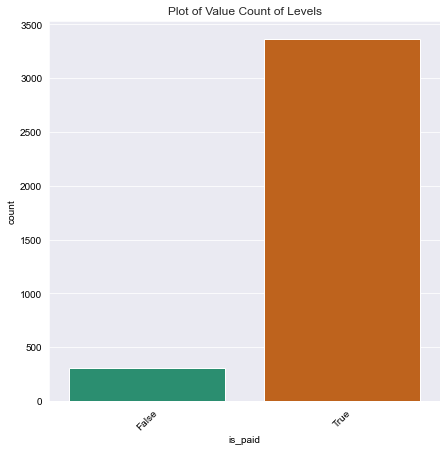

In [47]:
plt.figure(figsize=(7,7))
sns.countplot(df['is_paid'])
plt.title("Plot of Value Count of Levels")
plt.xticks(rotation=45)
plt.show()

#### Narative
+ <i>310 courses out of 3678 courses are provided for free by Udemy.</i>

In [48]:
# How many paid/free course in each subject category
df.groupby('is_paid')['subject'].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1099
         Web Development        1067
         Musical Instruments     634
         Graphic Design          568
Name: subject, dtype: int64

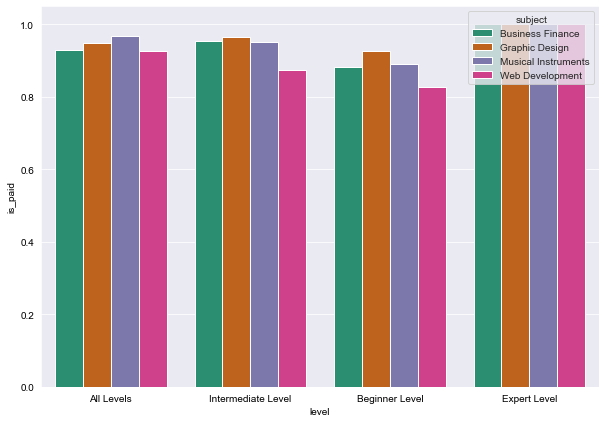

In [49]:
plt.figure(figsize=(10,7))
sns.barplot(x='level',y='is_paid', hue='subject',data=df,ci=None)
plt.show()

#### INFERENCE
+ <i>None of the courses in Expert Level are provide for free.</i>
+ <i>Beginner level Web Development courses are the ones with maximum proportion of free courses.</i>
________________

### Correlation Analysis on Subscribers <a class="anchor" id="corr-subs"></a>
+ Correlation Questions on Subscribers
	- Does number of subscribers depend on price?
	- Does number of subscribers depend on number of lectures?
	- Does number of subscribers depend on content duration?
    - Does Price Influence Subscription Per Subject Category?

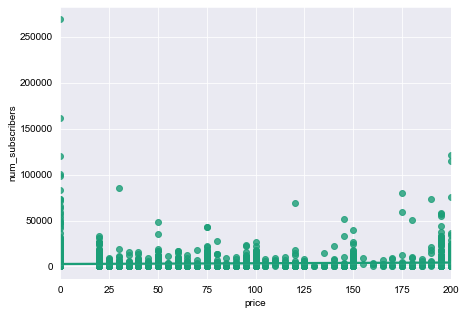

In [50]:
plt.figure(figsize = (7,5))
sns.regplot(data=df,x='price',y='num_subscribers')
plt.show()

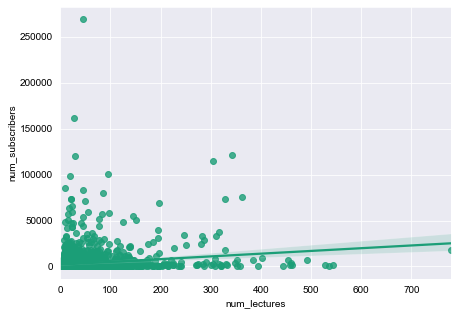

In [51]:
plt.figure(figsize = (7,5))
sns.regplot(data=df,x='num_lectures',y='num_subscribers')
plt.show()

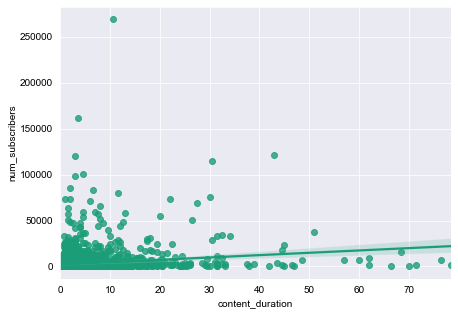

In [52]:
plt.figure(figsize = (7,5))
sns.regplot(data=df,x='content_duration',y='num_subscribers')
plt.show()

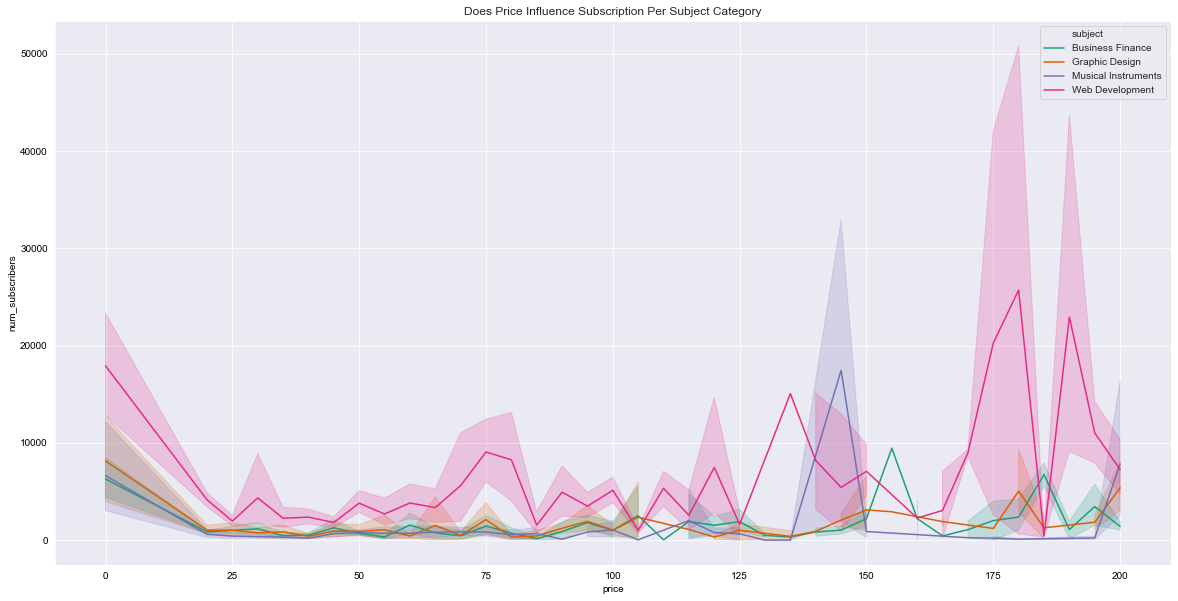

In [53]:
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='price',y='num_subscribers',hue='subject')
plt.show()

#### INFERENCE
+ <i>Number of suscribers is least depedndent on price if we consider all teh subjects altogether.</i>
+ <i>Dependence of Number of suscribers on Duration of content and number of lectures follows a similar fashion.</i>
+ <i>Unlike the first curve, subject wise number of subscribers shows better insight. The subscribers tend to increase and decrease frequently across price range for Web Development courses and there is little variance for other course categories. No perfect trend for price and subscribers.</i>
________________

### Analysis on Published Year <a class="anchor" id="pub-year"></a>
+ Published Year
	- Number of courses per year?
	- Distribution of subjects per year?
	- Which year has the highest number of courses?
	- What is the trend of courses per year and number of subscribers?

In [54]:
df['published_timestamp'].dtype

dtype('O')

In [55]:
df['published_timestamp'].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [56]:
#Splitting to access the non-time part of the timestamp string.
df['published_timestamp'].str.split('T')

0       [2017-01-18, 20:58:58Z]
1       [2017-03-09, 16:34:20Z]
2       [2016-12-19, 19:26:30Z]
3       [2017-05-30, 20:07:24Z]
4       [2016-12-13, 14:57:18Z]
                 ...           
3673    [2016-06-14, 17:36:46Z]
3674    [2017-03-10, 22:24:30Z]
3675    [2015-12-30, 16:41:42Z]
3676    [2016-08-11, 19:06:15Z]
3677    [2014-09-28, 19:51:11Z]
Name: published_timestamp, Length: 3678, dtype: object

In [57]:
df['published_date'] = df['published_timestamp'].str.split('T').str[0]

In [58]:
df['published_date']

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3673    2016-06-14
3674    2017-03-10
3675    2015-12-30
3676    2016-08-11
3677    2014-09-28
Name: published_date, Length: 3678, dtype: object

In [59]:
df = df.replace('3 hours', '2017-01-18')

In [60]:
#Converting into DateTime object for easy extraction of year
df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")

In [61]:
df.dtypes

course_id                       int64
course_title                   object
url                            object
is_paid                          bool
price                         float64
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                          object
content_duration              float64
published_timestamp            object
subject                        object
profit                        float64
published_date         datetime64[ns]
dtype: object

In [62]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day

In [63]:
#Number of subscribers per year
df.groupby('year').sum()['num_subscribers']

year
2011     119028
2012     555339
2013    1723438
2014    1930406
2015    3475324
2016    2966644
2017     988941
Name: num_subscribers, dtype: int64

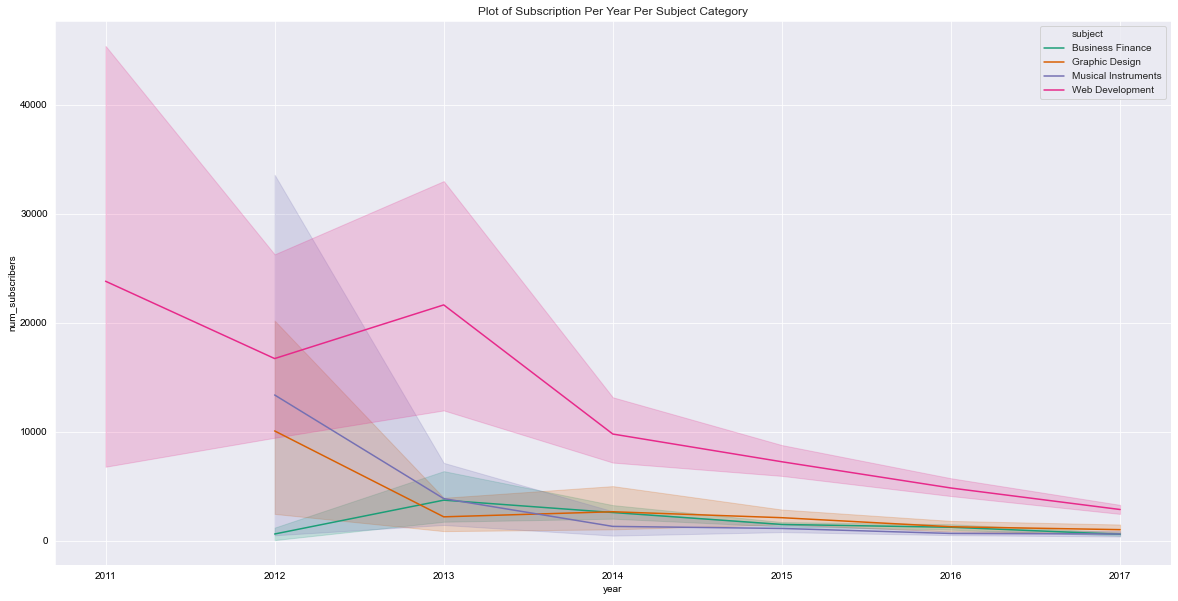

In [64]:
#Number of subscribers per year per Subject
plt.figure(figsize=(20,10))
plt.title("Plot of Subscription Per Year Per Subject Category")
sns.lineplot(data=df,x='year',y='num_subscribers',hue='subject')
plt.show()

#### INFERENCE
+ <i>Year 2011 comprised of only Web Development courses and had the all time greatest number of subscribers.</i>
+ <i>Increase in subscribers in 2012 and 2013 was only seen for WebD and Business Finance courses.</i>
+ <i>Since, 2013 there has been a gradual decrease in number of subscribersfor all subjects except fro Graphic Design which saw a rise between 2013 and 2014.</i>
________________

### Analysis via Pair Plot on Continues Valued Features <a class="anchor" id="pair-plot"></a>
+ Pair Plot Analysis Involving
	- Price
	- Number of Subscribers
	- Number of Reviews
	- Number of Lectures
    - Content Duration

In [65]:
df_pair_plot = df[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration', 'subject']]

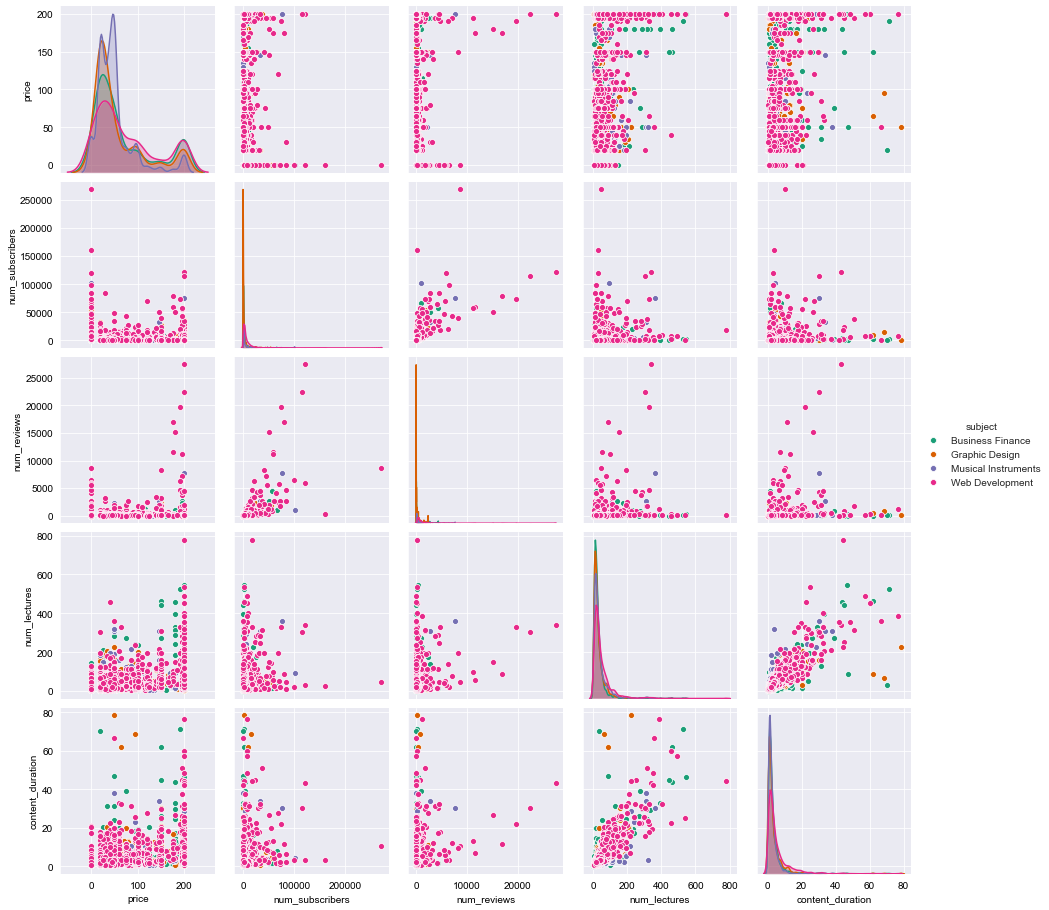

In [66]:
sns.pairplot(df_pair_plot, hue = 'subject')

#### INFERENCE
+ <i>Linear relationships can be found in between number of lectures and duration, number of subscribers and number of reviews.</i>
+ <i>Most of the feature pairs do not have a direct linear relation betwene them.</i>
________________

### Analysis on Course Titles <a class="anchor" id="course-title"></a>
+ Course Title
	- What is the most frequent words in course title?
	- Longest/Shortest course title?

In [67]:
# Get the Longest Title for a course
df['course_title'].str.len()

0       34
1       59
2       56
3       50
4       44
        ..
3673    56
3674    55
3675    29
3676    54
3677    52
Name: course_title, Length: 3678, dtype: int64

In [68]:
# Get the Longest Title for a course
df['course_title_len'] = df['course_title'].str.len()

In [69]:
# Get Longest title
df['course_title_len'].max()

243

In [70]:
# Get tlocation
df.iloc[243]

course_id                                                         337320
course_title           Cash Flow Valuation: Develop Your Financial Li...
url                     https://www.udemy.com/financial-literacy-basics/
is_paid                                                             True
price                                                                105
num_subscribers                                                     2987
num_reviews                                                           23
num_lectures                                                          19
level                                                         All Levels
content_duration                                                       2
published_timestamp                                 2014-12-22T13:39:16Z
subject                                                 Business Finance
profit                                                            313635
published_date                                     

In [71]:
df['course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3673    Learn jQuery from Scratch - Master of JavaScri...
3674    How To Design A WordPress Website With No Codi...
3675                        Learn and Build using Polymer
3676    CSS Animations: Create Amazing Effects on Your...
3677    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3678, dtype: object

In [72]:
import neattext.functions as nfx

In [73]:
# Text Cleaning to remove stopwords
df['clean_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [74]:
# Titles with Stopwords removed
df[['clean_title','course_title']]

,clean_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3673,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3674,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3675,Learn Build Polymer,Learn and Build using Polymer
3676,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


In [75]:
# Text Cleaning to remove all special characters
df['clean_title'] = df['clean_title'].apply(nfx.remove_special_characters)

In [76]:
# Titles with special characters removed
df['clean_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course  Certification  Grow Practice
2        Financial Modeling Business Analysts Consultants
3             Beginner Pro  Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3673      Learn jQuery Scratch  Master JavaScript library
3674                      Design WordPress Website Coding
3675                                  Learn Build Polymer
3676        CSS Animations Create Amazing Effects Website
3677              MODX CMS Build Websites Beginners Guide
Name: clean_title, Length: 3678, dtype: object

In [77]:
# Tokenization
all_title_list = df['clean_title'].to_list()

In [78]:
# Splitting each line into words and storing the words independently after converting them into tokens
all_tokens = [i for line in all_title_list for i in line.split()]

In [79]:
from collections import Counter

In [80]:
#Creating a hashmap to stre each word and it corresponding frequency of occurrence
word_freq = Counter(all_tokens)

In [81]:
#Storing top fifty waords in basis of occurrence
top_words = dict(word_freq.most_common(50))

In [82]:
name = []
count = []
for i in top_words:
    name.append(i)
    count.append(top_words[i])

In [83]:
df_count = pd.DataFrame()
df_count['Name'] = name
df_count['Count'] = count

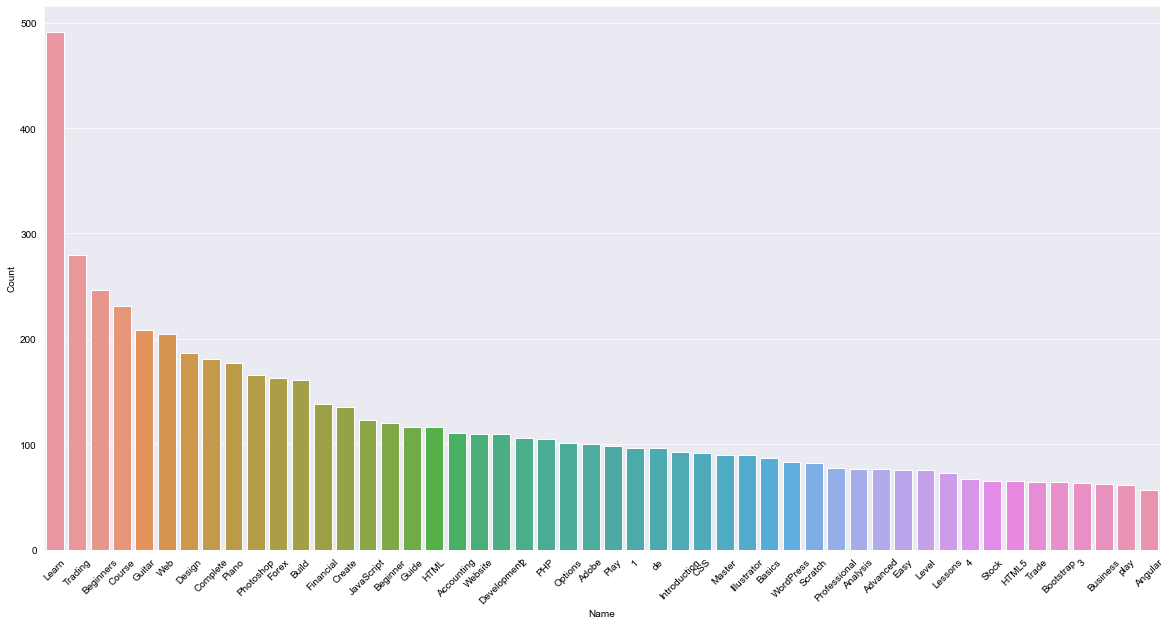

In [84]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Name', y = 'Count', data = df_count)
plt.xticks(rotation=45)
plt.show()

#### INFERENCE
+ <i>Learn is the most common word among all course titles.</i>
________________

## <u>COURSE RECOMMENDATION</u> <a class="anchor" id="cm"></a>
<br>
<div style="text-align: justify"> 
This section focues on implementation of the recommendation engine by using Course Titles by using cosine similarity index as a measure of similarity in between two courses. All intermmediate steps comprising vectorization, tokenization, similarity calculation and recommendation are explained further.
</div>
<br>

### Cosine Similarity Index <a class="anchor" id="cos-sim"></a>
<br>
<div style="text-align: justify"> 
Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.
</div>
<br>

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Data Vectorization <a class="anchor" id="data-vec"></a>
<br>
<div style="text-align: justify"> 
The first step in vectorization is to clean our dataset from speacial characters and stopwords. Then we will be using Bag of Words approach to vectorize the data, which will be implemented via count vectorization. 
</div>
<br>

In [86]:
df['course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3673    Learn jQuery from Scratch - Master of JavaScri...
3674    How To Design A WordPress Website With No Codi...
3675                        Learn and Build using Polymer
3676    CSS Animations: Create Amazing Effects on Your...
3677    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3678, dtype: object

In [87]:
# Text Cleaning to remove stop words
df['clean_course_title'] = df['course_title'].apply(nfx.remove_stopwords)
# Text Cleaning to remove all special characters
df['clean_course_title'] = df['clean_course_title'].apply(nfx.remove_special_characters)

df[['course_title','clean_course_title']]

,course_title,clean_course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow You...,Complete GST Course Certification Grow Practice
2,Financial Modeling for Business Analysts and C...,Financial Modeling Business Analysts Consultants
3,Beginner to Pro - Financial Analysis in Excel ...,Beginner Pro Financial Analysis Excel 2017
4,How To Maximize Your Profits Trading Options,Maximize Profits Trading Options
...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,Learn jQuery Scratch Master JavaScript library
3674,How To Design A WordPress Website With No Codi...,Design WordPress Website Coding
3675,Learn and Build using Polymer,Learn Build Polymer
3676,CSS Animations: Create Amazing Effects on Your...,CSS Animations Create Amazing Effects Website


In [88]:
# Vectorize our Text using Count Vectorizer
count_vect = CountVectorizer()
cv_mat = count_vect.fit_transform(df['clean_course_title'])

In [89]:
#cv_mat is a sparse matrix returned by Count Vectorizer
cv_mat

<3678x3559 sparse matrix of type '<class 'numpy.int64'>'
	with 18333 stored elements in Compressed Sparse Row format>

In [90]:
#todense() function gives a dense copy of the dataset
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [91]:
#Feature Names generated after vectorization
count_vect.get_feature_names()[400:450]

['bending',
 'benefit',
 'benefits',
 'besserem',
 'best',
 'besten',
 'bestseller',
 'bestselling',
 'betrgen',
 'better',
 'beveled',
 'beyer',
 'bi',
 'big',
 'billionaire',
 'binarias',
 'binary',
 'biotech',
 'bird',
 'birthday',
 'bitcoin',
 'bitcoins',
 'bitesize',
 'biz',
 'black',
 'blake',
 'blender',
 'blind',
 'blitz',
 'bloc',
 'block',
 'blockchain',
 'blocks',
 'blog',
 'blogger',
 'bloggers',
 'blogging',
 'blogs',
 'blowing',
 'blue',
 'bluegrass',
 'bluemix',
 'blueprint',
 'blues',
 'blurb',
 'board',
 'boat',
 'bodhran',
 'bolsa',
 'bond']

In [92]:
#Converting and storing the matrix as aa pandas dataframe with corresponding features as column vectors
df_cv_words = pd.DataFrame(cv_mat.todense(),columns=count_vect.get_feature_names())
df_cv_words

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cosine Similarity Matrix <a class="anchor" id="cos-sim-mat"></a>
<br>
<div style="text-align: justify"> 
The similarity matrix calculates the cos of the angle between each pair of vectors and stores the same in the form of a matrix. As discussed earlier, the cosine of the angle between the vectors represents the cosine similarity between the vectors.
</div>
<br>

In [93]:
# Genearting the Cosine Similarity Matrix from the vectors generated by count vectorizer 
cosine_sim_mat = cosine_similarity(cv_mat.todense())
cosine_sim_mat

array([[1.        , 0.20412415, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20412415, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.23570226],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23570226, 0.        ,
        1.        ]])

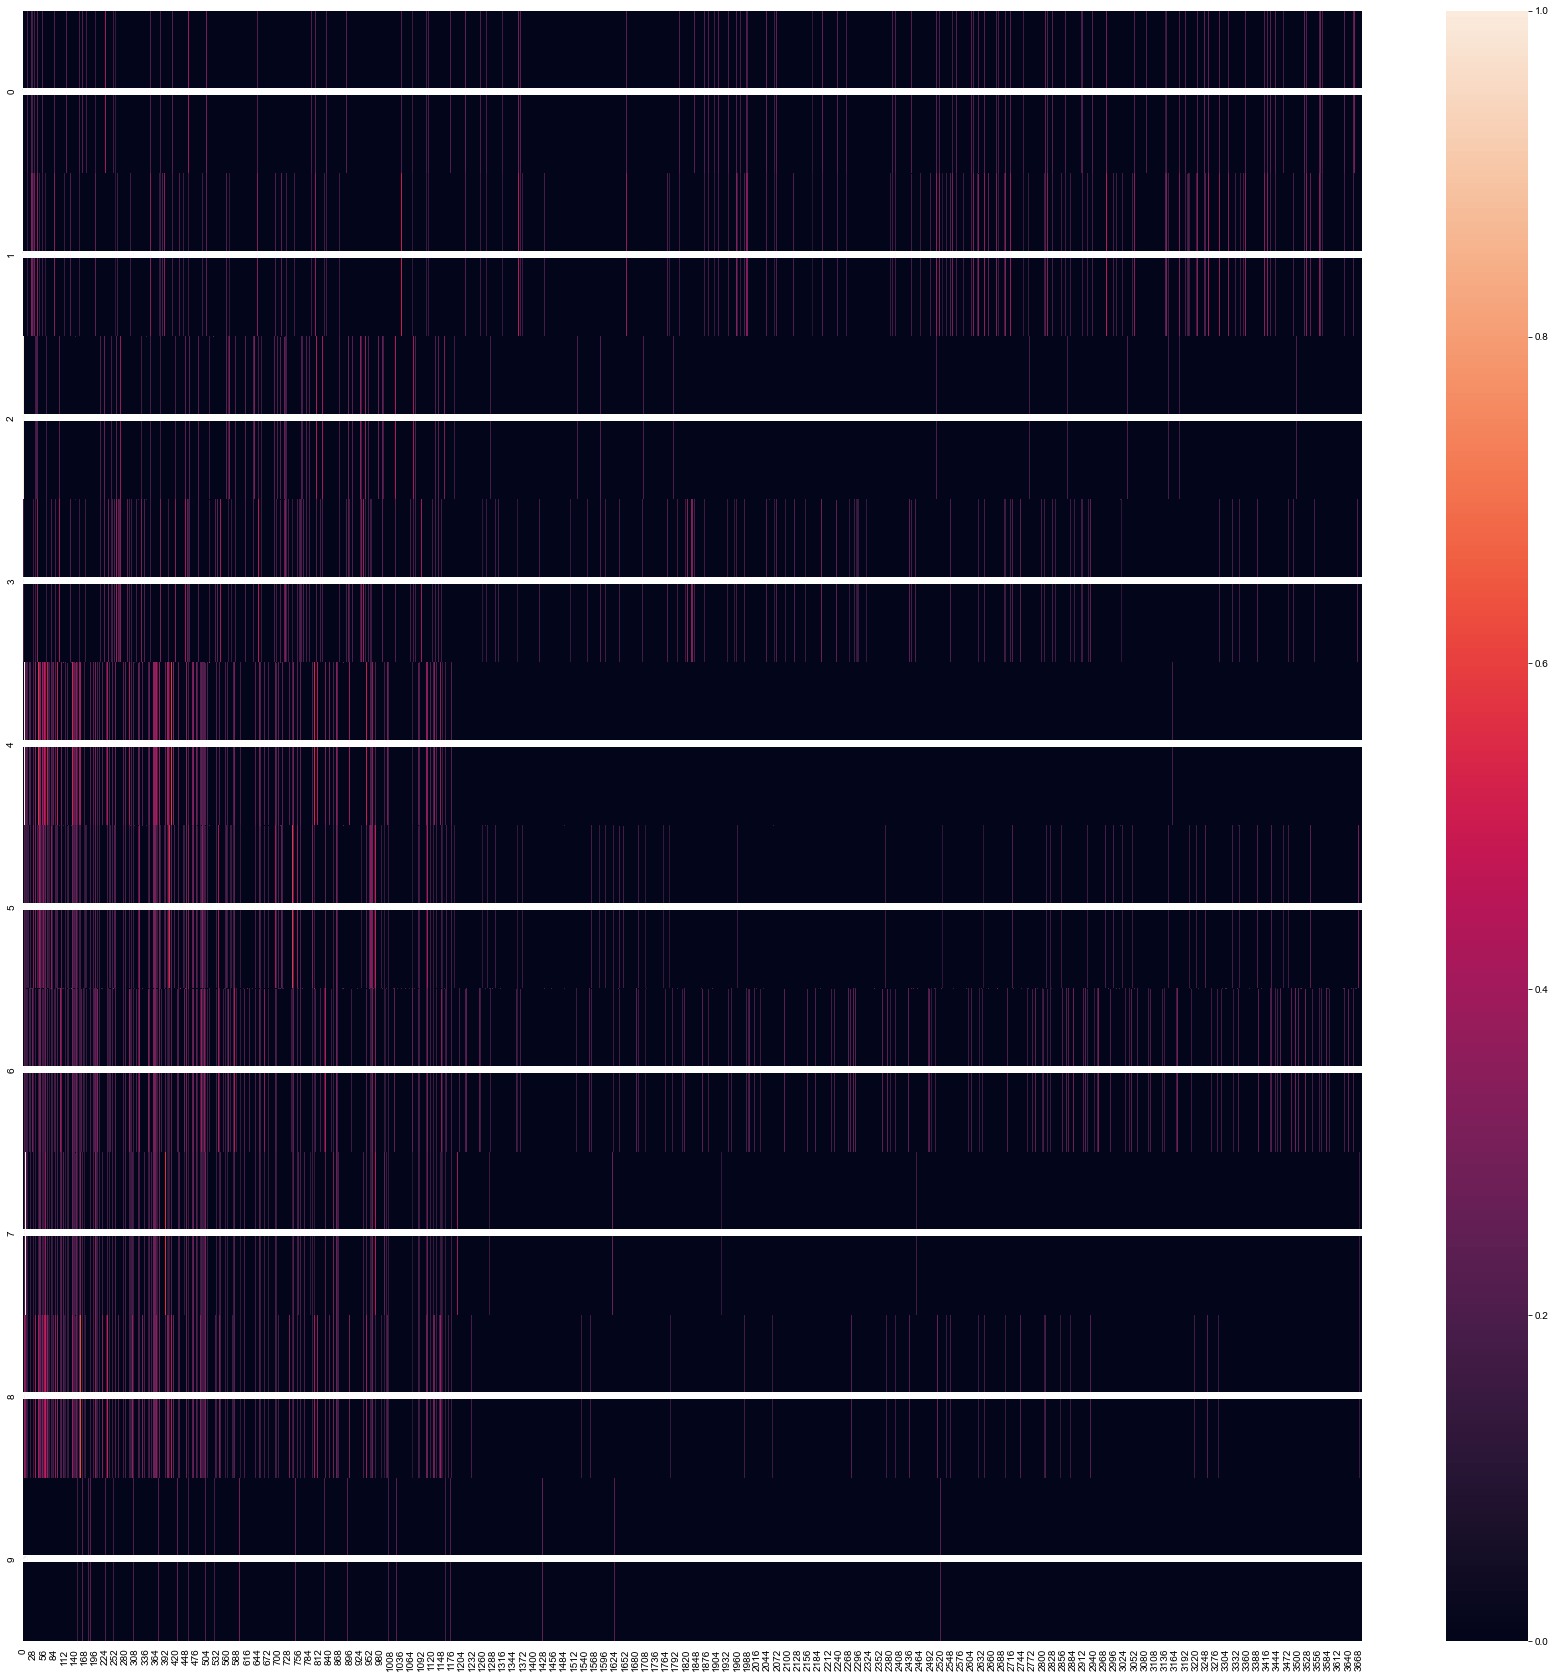

In [94]:
plt.figure(figsize=(30,30))
sns.heatmap(cosine_sim_mat[0:10],annot=True)
plt.show()

### Reccommendation <a class="anchor" id="recm"></a>
<br>
<div style="text-align: justify"> 
The Recommendation algorithm retrieves the cosine similarity values for the reference course with other courses. The results with the highest similarity values are the ones that are recommended to the user.
</div>
<br>

In [95]:
df_indices = pd.DataFrame(df.index, df['course_title'])
df_indices

,0
course_title,
Ultimate Investment Banking Course,0
Complete GST Course & Certification - Grow Your CA Practice,1
Financial Modeling for Business Analysts and Consultants,2
Beginner to Pro - Financial Analysis in Excel 2017,3
How To Maximize Your Profits Trading Options,4
...,...
Learn jQuery from Scratch - Master of JavaScript library,3673
How To Design A WordPress Website With No Coding At All,3674
Learn and Build using Polymer,3675


In [96]:
# Considering a dummy course with title  - 'How To Maximize Your Profits Trading Options'
idx = df_indices.loc['How To Maximize Your Profits Trading Options',0]
idx

4

In [97]:
scores = cosine_sim_mat[:,idx]
scores

array([0., 0., 0., ..., 0., 0., 0.])

In [98]:
df_indices['scores'] = scores
df_indices

,0,scores
course_title,,
Ultimate Investment Banking Course,0,0.0
Complete GST Course & Certification - Grow Your CA Practice,1,0.0
Financial Modeling for Business Analysts and Consultants,2,0.0
Beginner to Pro - Financial Analysis in Excel 2017,3,0.0
How To Maximize Your Profits Trading Options,4,1.0
...,...,...
Learn jQuery from Scratch - Master of JavaScript library,3673,0.0
How To Design A WordPress Website With No Coding At All,3674,0.0
Learn and Build using Polymer,3675,0.0


In [99]:
# Sort our scores per cosine score
df_indices = df_indices.sort_values(by='scores', ascending=False)
df_indices

,0,scores
course_title,,
How To Maximize Your Profits Trading Options,4,1.000000
Trading Options Basics,408,0.577350
Options Trading - How to Win with Weekly Options,43,0.566947
Intermediate Options trading concepts for Stocks and Options,94,0.530330
Options Spreads Bundle- the heart of Options Trading,801,0.530330
...,...,...
Pixelmator - Create Vector Graphics From Scratch,1446,0.000000
Creating an animated greeting card via Google Slides,1447,0.000000
Most Wanted Flat Design Techniques #3: Office Space,1448,0.000000


In [100]:
# Omit the First Value
recommended_result = df_indices.iloc[1:,:]
recommended_result.head(20)

,0,scores
course_title,,
Trading Options Basics,408,0.577350
Options Trading - How to Win with Weekly Options,43,0.566947
Intermediate Options trading concepts for Stocks and Options,94,0.530330
Options Spreads Bundle- the heart of Options Trading,801,0.530330
The Advantages of ETF Options and Index Options Trading,442,0.530330
"Forex Trading with Fixed 'Risk through Options Trading""",136,0.530330
Trading Options For Consistent Returns: Options Basics,193,0.530330
Options Trading 101: The Basics,95,0.500000
Advanced Options Trading Course,736,0.500000


In [101]:
#The function takes a course title and a number as input and returns the the top similar records
def recommend_course(title,num_of_rec=10):
    df_indices = pd.DataFrame(df.index, df['course_title'])
    # ID for title
    idx = df_indices.loc[title,0]
    # Course Indice
    # Search inside cosine_sim_mat
    scores = cosine_sim_mat[:,idx]
    try:
        df_indices['scores'] = scores
    except:
        df_indices['scores'] = scores[:,0]
    # Scores
    # Sort Scores
    df_indices = df_indices.sort_values(by='scores', ascending=False)
    # Recomm
    recommended_result = df_indices[df_indices['scores'] < np.float64(1.0)]
    return recommended_result.head(num_of_rec)

In [102]:
recommend_course('Trading Options Basics',4)

,0,scores
course_title,,
Options Trading 101: The Basics,95,0.866025
Trading Options For Consistent Returns: Options Basics,193,0.816497
Basics of Trading,861,0.816497
Options Trading Basics (3-Course Bundle),66,0.774597


In [103]:
#Function to facilitate multiple reccomendations

def multirecommend(data,numforeach,numreturn):
    df_val = pd.DataFrame()
    for s in data:
        df_val = df_val.append(recommend_course(s,numforeach))

    df_val = df_val.sort_values(by = 'scores',ascending = False)
    return df_val.head(numreturn)

In [104]:
# Existing User Data depicting the courses preffered or previously subscribed by the user
data = ['Trading Options Basics', 'Creating an animated greeting card via Google Slides', 'Learn jQuery from Scratch - Master of JavaScript library', 'CSS Animations: Create Amazing Effects on Your Website']
multirecommend(data,5,10)

,0,scores
course_title,,
Options Trading 101: The Basics,95,0.866025
Learn Javascript & JQuery From Scratch,2619,0.816497
Basics of Trading,861,0.816497
Trading Options For Consistent Returns: Options Basics,193,0.816497
Options Trading Basics (3-Course Bundle),66,0.774597
Learn JavaScript from scratch,2770,0.707107
Trading: Basics of Trading for Beginners,800,0.707107
JavaScript For Beginners : Learn JavaScript From Scratch,2626,0.617213
JQuery Basics - Learn JQuery From Scratch,3491,0.617213


## <u>SUBJECT PREDICTION</u> <a class="anchor" id="sbj"></a>
<br>
<div style="text-align: justify"> 
This section focues on implementation of machine learning models for predictive classification of course titles into subject groups. The subjects to be considered are the four classes of subjects provided in the dataset being used till now. The module starts off with the cleaning and vectorization of text data and then applying machine learning models for predicting the suject of the input title. We will be utilizing TF-IDF for vectorization and we will study the performance of logistic regression and decision trees for classification of course title.
</div>
<br>

### Text Cleaning <a class="anchor" id="text-clean"></a>
<br>
<div style="text-align: justify"> 
The raw text is firstly processed to remove all existing stopwords, special characters and punctuation marks. The initial noise removal from teh text is necessary to help focus on only the relevant words in the course title and ignore the unimportant ones.
</div>
<br>

In [105]:
# Load Dataset
df = pd.read_csv("udemy_courses_new.csv")

In [106]:
df['clean_course_title'] = df['course_title'].apply(nfx.remove_stopwords)
df['clean_course_title'] = df['clean_course_title'].apply(nfx.remove_special_characters)
df['clean_course_title'] = df['clean_course_title'].str.lower()
df[['clean_course_title', 'course_title']].head()

,clean_course_title,course_title
0,ultimate investment banking course,Ultimate Investment Banking Course
1,complete gst course certification grow practice,Complete GST Course & Certification - Grow You...
2,financial modeling business analysts consultants,Financial Modeling for Business Analysts and C...
3,beginner pro financial analysis excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,maximize profits trading options,How To Maximize Your Profits Trading Options


### Text Vectorization <a class="anchor" id="text-vec"></a>
<br>
<div style="text-align: justify"> 
The raw text needs to be precisely vectorized for further processing as machine learning models cannot directly access text data. We will be using teh concept of <i>Term Frequency-Inverse Document Frequency</i> or TF-IDF to vectorize the data. This model shines better compared to the Count Vectorization model as it assigns more weights to more relevant words in teh course title unlike count vectorizer which assigns equal weights to all words. Behind the scenes, the package calculates the TF matrix and IDF matrix and multiplies them to get the final weights.
</div>
<br>
TF of a word = Occurrences of a word / Total number of words
<br>
IDF of a word = log ( Total number of sentences / Number of sentences containing the word )
<br>

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

Xfeatures = df['clean_course_title']
ylabels = df['subject']

In [108]:
tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(Xfeatures)

In [109]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [110]:
df_tfid_vec = pd.DataFrame(X.todense(),columns=tfidf_vec.get_feature_names())

In [111]:
df_tfid_vec.T

,0,1,2,3,4,5,6,7,8,9,...,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677
000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuhause,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Building & Evaluation<a class="anchor" id="model"></a>
<br>
<div style="text-align: justify"> 
As it is a classification problem, we will be comparing the performance of a Logistic Regression Model, a SVM Classifier Model and a Decision Tree Model to classify the input titles into corresponding subjects. 
</div>
<br>

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [113]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

model1 = LogisticRegression( multi_class='multinomial')
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.9402173913043478

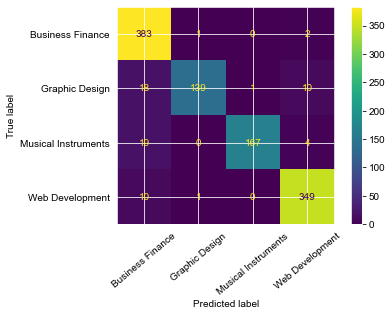

In [114]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

y_pred = model1.predict(x_test)
plot_confusion_matrix(model1,x_test,y_test,xticks_rotation=40)

In [115]:
# Classification Report
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.99      0.89      0.94       430
     Graphic Design       0.83      0.99      0.90       141
Musical Instruments       0.88      0.99      0.93       168
    Web Development       0.97      0.96      0.96       365

           accuracy                           0.94      1104
          macro avg       0.92      0.96      0.93      1104
       weighted avg       0.95      0.94      0.94      1104



In [117]:
### Making A Single Prediction
text = "UI Development"
my_vec = tfidf_vec.transform([text]).toarray()
model1.predict(my_vec)

array(['Web Development'], dtype=object)

In [118]:
# Prediction Prob
model1.predict_proba(my_vec)

array([[0.11450694, 0.06666058, 0.0628618 , 0.75597068]])

In [119]:
model1.classes_

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [120]:
from sklearn import tree

model2 = tree.DecisionTreeClassifier(criterion='gini', max_depth = 165)
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.8894927536231884

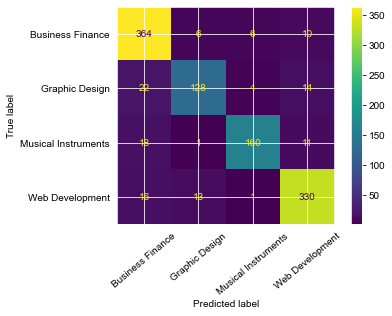

In [121]:
y_pred = model2.predict(x_test)
plot_confusion_matrix(model2,x_test,y_test,xticks_rotation=40)

In [122]:
# Classification Report
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.94      0.87      0.90       420
     Graphic Design       0.76      0.86      0.81       148
Musical Instruments       0.84      0.94      0.89       171
    Web Development       0.92      0.90      0.91       365

           accuracy                           0.89      1104
          macro avg       0.87      0.89      0.88      1104
       weighted avg       0.89      0.89      0.89      1104



In [123]:
from sklearn.svm import SVC
model3 =  SVC(kernel = 'linear')
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.9447463768115942

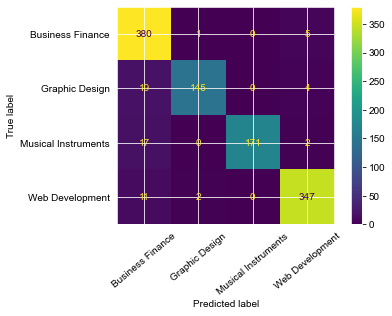

In [124]:
y_pred = model3.predict(x_test)
plot_confusion_matrix(model3,x_test,y_test,xticks_rotation=40)

In [125]:
# Classification Report
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.98      0.89      0.93       427
     Graphic Design       0.86      0.98      0.92       148
Musical Instruments       0.90      1.00      0.95       171
    Web Development       0.96      0.97      0.97       358

           accuracy                           0.94      1104
          macro avg       0.93      0.96      0.94      1104
       weighted avg       0.95      0.94      0.94      1104



In [126]:
from sklearn.metrics import f1_score

print("----------------F1 Scores---------------------")
print("F1 Score for Logistic Regression", f1_score(model1.predict(x_test), y_test, average='weighted'))
print("F1 Score for Decision Tree Classifier", f1_score(model2.predict(x_test), y_test, average='weighted'))
print("F1 Score for SVM Classifier", f1_score(model3.predict(x_test), y_test, average='weighted'))

----------------F1 Scores---------------------
F1 Score for Logistic Regression 0.940806754017821
F1 Score for Decision Tree Classifier 0.8904967231198181
F1 Score for SVM Classifier 0.9447643139763469
